<a href="https://colab.research.google.com/github/HenriqueBrainer/Mackenzie/blob/main/C%C3%B3pia_de_Lab_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">


# Lab: Matplotlib

Referências e Materiais úteis para este Lab:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="40%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

Acesse o capítulo [Gráficos com Matplotlib](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c2_parte_1.html)

<br>

Para saber mais:
- Veja no livro muito mais sobre o `Matplotlib`.

- Você também pode acessar diretamente as bibliotecas do `Matplotlib`

  - https://matplotlib.org/

  - https://matplotlib.org/stable/tutorials/index.html

  - https://matplotlib.org/stable/gallery/index.html


---



# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Exercício 1

Produza um gráfico de linha para uma função matemática de sua escolha.

1. Inclua um título com a função
2. Altere a cor e o estilo de linha do gráfico
3. Altere o tamanho da figura
4. Inclua rótulos para os eixos do gráfico

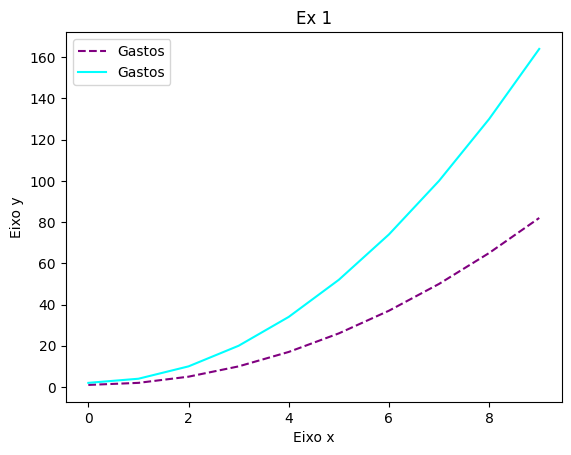

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def f(x):
  return x**2 + 1

x = np.arange(0,10,1) # o mesmo que x = np.array([0,1,2,3,4,5,6,7,8,9])
y = f(x)

plt.plot(x ,y, label='Gastos', linestyle='dashed', color='purple')
plt.plot(x ,y*2, label='Gastos', color='cyan')
plt.legend()
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title("Ex 1")
plt.show()


# Exercício 2

O código abaixo retorna os `day_before` valores do bitcoin US anteriores a data `last_date`. Você pode alterar o ativo, a data e o número de dias para obter outros dados.

In [ ]:
#@markdown install yahoofinancials
%%capture
!pip install yfinance
!pip install yahoofinancials

In [ ]:
stock_name = 'AMD'
last_date = "2024-01-22"
days_before = 30

In [ ]:
#@markdown get stock data
from yahoofinancials import YahooFinancials
from datetime import datetime, timedelta

yahoo_financials = YahooFinancials(stock_name)

last_date_days_before = datetime.strptime(last_date, '%Y-%m-%d') + timedelta(days=- days_before - 1)
last_date_days_before = datetime.strftime(last_date_days_before, '%Y-%m-%d')
print(stock_name, ' from ', last_date_days_before, ' to ', last_date)
print()

data = yahoo_financials.get_historical_price_data(last_date_days_before, last_date, "daily")
df = pd.DataFrame(data[stock_name]['prices'])

df = df.fillna(0)

display(df.head())
print()

for c in df.columns[1:-1]:
  exec(c + '_' + stock_name.replace('-','').replace('.','') + ' = np.array( np.round( df[ "' + c + '" ],2 ))')
  exec('print( "' + c + '_' + stock_name.replace('-','').replace('.','') + ' = ", ' + c + '_' + stock_name.replace('-','').replace('.','') + ' )')
  print()

AMD  from  2023-12-22  to  2024-01-22



,date,high,low,open,close,volume,adjclose,formatted_date
0,1703255400,140.699997,138.309998,140.479996,139.600006,35370400,139.600006,2023-12-22
1,1703601000,143.850006,139.919998,140.070007,143.410004,47157400,143.410004,2023-12-26
2,1703687400,146.250000,143.179993,144.720001,146.070007,49033400,146.070007,2023-12-27
3,1703773800,150.410004,145.949997,146.800003,148.759995,63800700,148.759995,2023-12-28
4,1703860200,151.050003,147.199997,149.500000,147.410004,62028200,147.410004,2023-12-29



high_AMD =  [140.7  143.85 146.25 150.41 151.05 144.4  137.43 137.7  141.01 147.15
 149.86 150.88 150.38 148.75 159.72 160.64 168.6  174.25]

low_AMD =  [138.31 139.92 143.18 145.95 147.2  137.43 133.74 134.   136.44 140.15
 145.08 146.65 143.69 145.   149.98 154.4  158.22 162.2 ]

open_AMD =  [140.48 140.07 144.72 146.8  149.5  144.28 135.71 134.3  136.78 140.36
 145.95 150.07 148.52 148.04 150.36 158.45 166.2  165.8 ]

close_AMD =  [139.6  143.41 146.07 148.76 147.41 138.58 135.32 136.01 138.58 146.18
 149.26 148.54 148.02 146.56 158.74 160.17 162.67 174.23]

volume_AMD =  [ 35370400  47157400  49033400  63800700  62028200  64902000  61988600
  58610300  69595000  71756900  67875700  56951200  62764600  48250800
 112711400 104085000 131864900 139825500]

adjclose_AMD =  [139.6  143.41 146.07 148.76 147.41 138.58 135.32 136.01 138.58 146.18
 149.26 148.54 148.02 146.56 158.74 160.17 162.67 174.23]



a) Escolha um ativo, uma data e um número de dias de sua preferência e faça um gráfico dos valores `adjclose`, `high` e `low`, adicionando rótulos, cores e estilo de linha diferentes para cada valor. Não esqueça de adicionar título ao gráfico, eixos e empregar um tamanho adequado para a figura.

Para consulta de ativos no Yahoo Finance, pesquise em: https://ca.finance.yahoo.com/lookup

b) Inclua agora, no gráfico anterior, o valor de volume. O que aconteceu? Que solução você daria para isso?



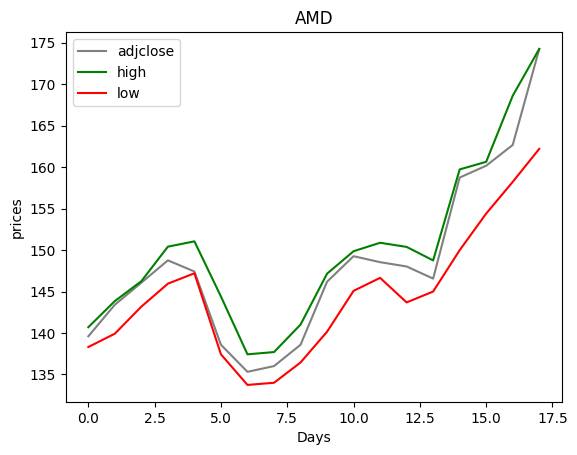

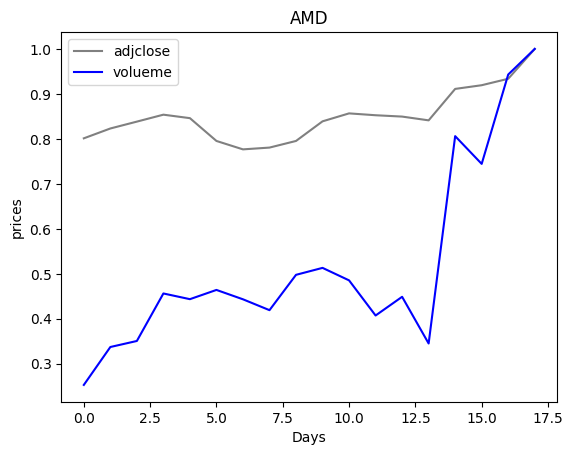

In [ ]:
dias = np.arange(0, len(adjclose_AMD))
plt.plot(dias ,adjclose_AMD, label='adjclose', color='gray')
plt.plot(dias ,high_AMD, label='high', color='green')
plt.plot(dias ,low_AMD, label='low', color='red')
plt.legend()
plt.xlabel('Days')
plt.ylabel('prices')
plt.title("AMD")
plt.show()

adjclose_AMD_norm = adjclose_AMD / adjclose_AMD.max() #Normalização, para valores discrepantes
volume_AMD_norm = volume_AMD / volume_AMD.max()

plt.plot(dias ,adjclose_AMD_norm, label='adjclose', color='gray')
plt.plot(dias ,volume_AMD_norm, label='volume', color='blue')
plt.legend()
plt.xlabel('Days')
plt.ylabel('prices')
plt.title("AMD")
plt.show()

